In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

In [3]:
file_path = '/kaggle/input/dataset-sncb/dataset_ar41_for_ulb.csv'
data = pd.read_csv(file_path)

In [11]:
data['airTempAnomaly'] = ((data['RS_E_InAirTemp_PC1'] > 65) | (data['RS_E_InAirTemp_PC2'] > 65))
data['waterTempAnomaly'] = ((data['RS_E_WatTemp_PC1'] > 100) | (data['RS_E_WatTemp_PC2'] > 100))
data['oilTempAnomaly'] = ((data['RS_T_OilTemp_PC1'] > 115) | (data['RS_T_OilTemp_PC2'] > 115))

In [12]:
def concatenate_anomalies(row):
    anomalies = []
    if row['airTempAnomaly']:
        anomalies.append('AirTempAnomaly')
    if row['waterTempAnomaly']:
        anomalies.append('WaterTempAnomaly')
    if row['oilTempAnomaly']:
        anomalies.append('OilTempAnomaly')
    return ', '.join(anomalies)

In [13]:
data['TempAnomalies'] = data.apply(concatenate_anomalies, axis=1)
data = data.drop(['airTempAnomaly', 'waterTempAnomaly', 'oilTempAnomaly'], axis=1)
anomaly_data = data[data['TempAnomalies'] != '']

In [14]:
data['timestamps_floor'] = pd.to_datetime(data['timestamps_floor'])

data['Hour'] = data['timestamps_floor'].dt.strftime('%H:00')
data['Day_of_Week'] = data['timestamps_floor'].dt.day_name()
data['Month'] = data['timestamps_floor'].dt.month_name()

In [16]:
anomaly_data = data[data['TempAnomalies'] != '']

In [18]:
anomaly_data.head()

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,...,Lat,Lon,Time,Temperature,Humidity,Rain,TempAnomalies,Hour,Day_of_Week,Month
769,150.0,2023-08-25 07:24:15,51.015536,3.775840,77.0,32.0,0.0,213.0,0.0,798.0,...,51.01,3.761,2023-08-25 07:00:00,18.7,94,0.1,AirTempAnomaly,07:00,Friday,August
1011,150.0,2023-08-25 06:40:09,51.032688,3.738170,78.0,33.0,0.0,379.0,0.0,1662.0,...,51.01,3.761,2023-08-25 06:00:00,18.6,95,0.0,AirTempAnomaly,06:00,Friday,August
1106,170.0,2023-08-02 06:40:54,51.040250,3.693570,62.0,68.0,3.0,0.0,0.0,0.0,...,51.01,3.661,2023-08-02 06:00:00,16.8,93,1.0,AirTempAnomaly,06:00,Wednesday,August
1228,166.0,2023-08-01 21:51:54,51.013072,3.780722,53.0,70.0,6.0,0.0,0.0,0.0,...,51.01,3.761,2023-08-01 21:00:00,16.8,82,0.0,AirTempAnomaly,21:00,Tuesday,August
1896,174.0,2023-08-04 13:04:21,50.419657,4.534719,66.0,32.0,6.0,300.0,0.0,799.0,...,50.41,4.561,2023-08-04 13:00:00,18.6,65,0.7,AirTempAnomaly,13:00,Friday,August


In [19]:
num_rows = anomaly_data.shape[0]
num_rows

79915

In [20]:
anomaly_data.to_csv('/kaggle/working/r4_r5.csv', index=False)

In [30]:
anomalies_by_hour = data[data['airTempAnomaly'] == 1].groupby('Hour')['airTempAnomaly'].count()
anomalies_by_day = data[data['airTempAnomaly'] == 1].groupby('Day_of_Week')['airTempAnomaly'].count()
anomalies_by_month = data[data['airTempAnomaly'] == 1].groupby('Month')['airTempAnomaly'].count()

(anomalies_by_hour, anomalies_by_day, anomalies_by_month)

(Hour
 00:00     311
 01:00      75
 02:00     103
 03:00     280
 04:00     458
 05:00     554
 06:00    2106
 07:00    4152
 08:00    2811
 09:00    3949
 10:00    4062
 11:00    6885
 12:00    6478
 13:00    2980
 14:00    3717
 15:00    3119
 16:00    3825
 17:00    4461
 18:00    4020
 19:00    4794
 20:00    3921
 21:00    7288
 22:00    5561
 23:00    2474
 Name: airTempAnomaly, dtype: int64,
 Day_of_Week
 Friday       12988
 Monday       13072
 Saturday      8510
 Sunday        6647
 Thursday     13292
 Tuesday      12153
 Wednesday    11722
 Name: airTempAnomaly, dtype: int64,
 Month
 April         2969
 August       11817
 February      2290
 January        825
 July         10641
 June         26699
 March         1822
 May          10265
 September    11056
 Name: airTempAnomaly, dtype: int64)

**Anomalies by Hour of the Day:** This bar chart shows that anomalies peak around noon and in the late evening, specifically around 11 AM and 9 PM. The early morning hours (12 AM to 5 AM) have the lowest frequency of anomalies.

**Anomalies by Day of the Week:** Anomalies are fairly evenly distributed throughout the week with a slight increase on Thursdays.
The weekends (Saturday and Sunday) show a lower frequency of anomalies, which may be due to reduced train operation.

**Anomalies by Month:** There is a clear seasonal pattern, with the highest number of anomalies occurring in the summer months (April, May, June, July, August, and September). The winter and early spring months (January, March, April) show the fewest anomalies.

/tmp/ipykernel_13/3820005507.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='airTempAnomaly', data=hourly_data, ax=axes[0], palette="Blues_d")
/tmp/ipykernel_13/3820005507.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day_of_Week', y='airTempAnomaly', data=daily_data, ax=axes[1], palette="Greens_d")
/tmp/ipykernel_13/3820005507.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='airTempAnomaly', data=monthly_data, ax=axes[2], palette="Reds_d")


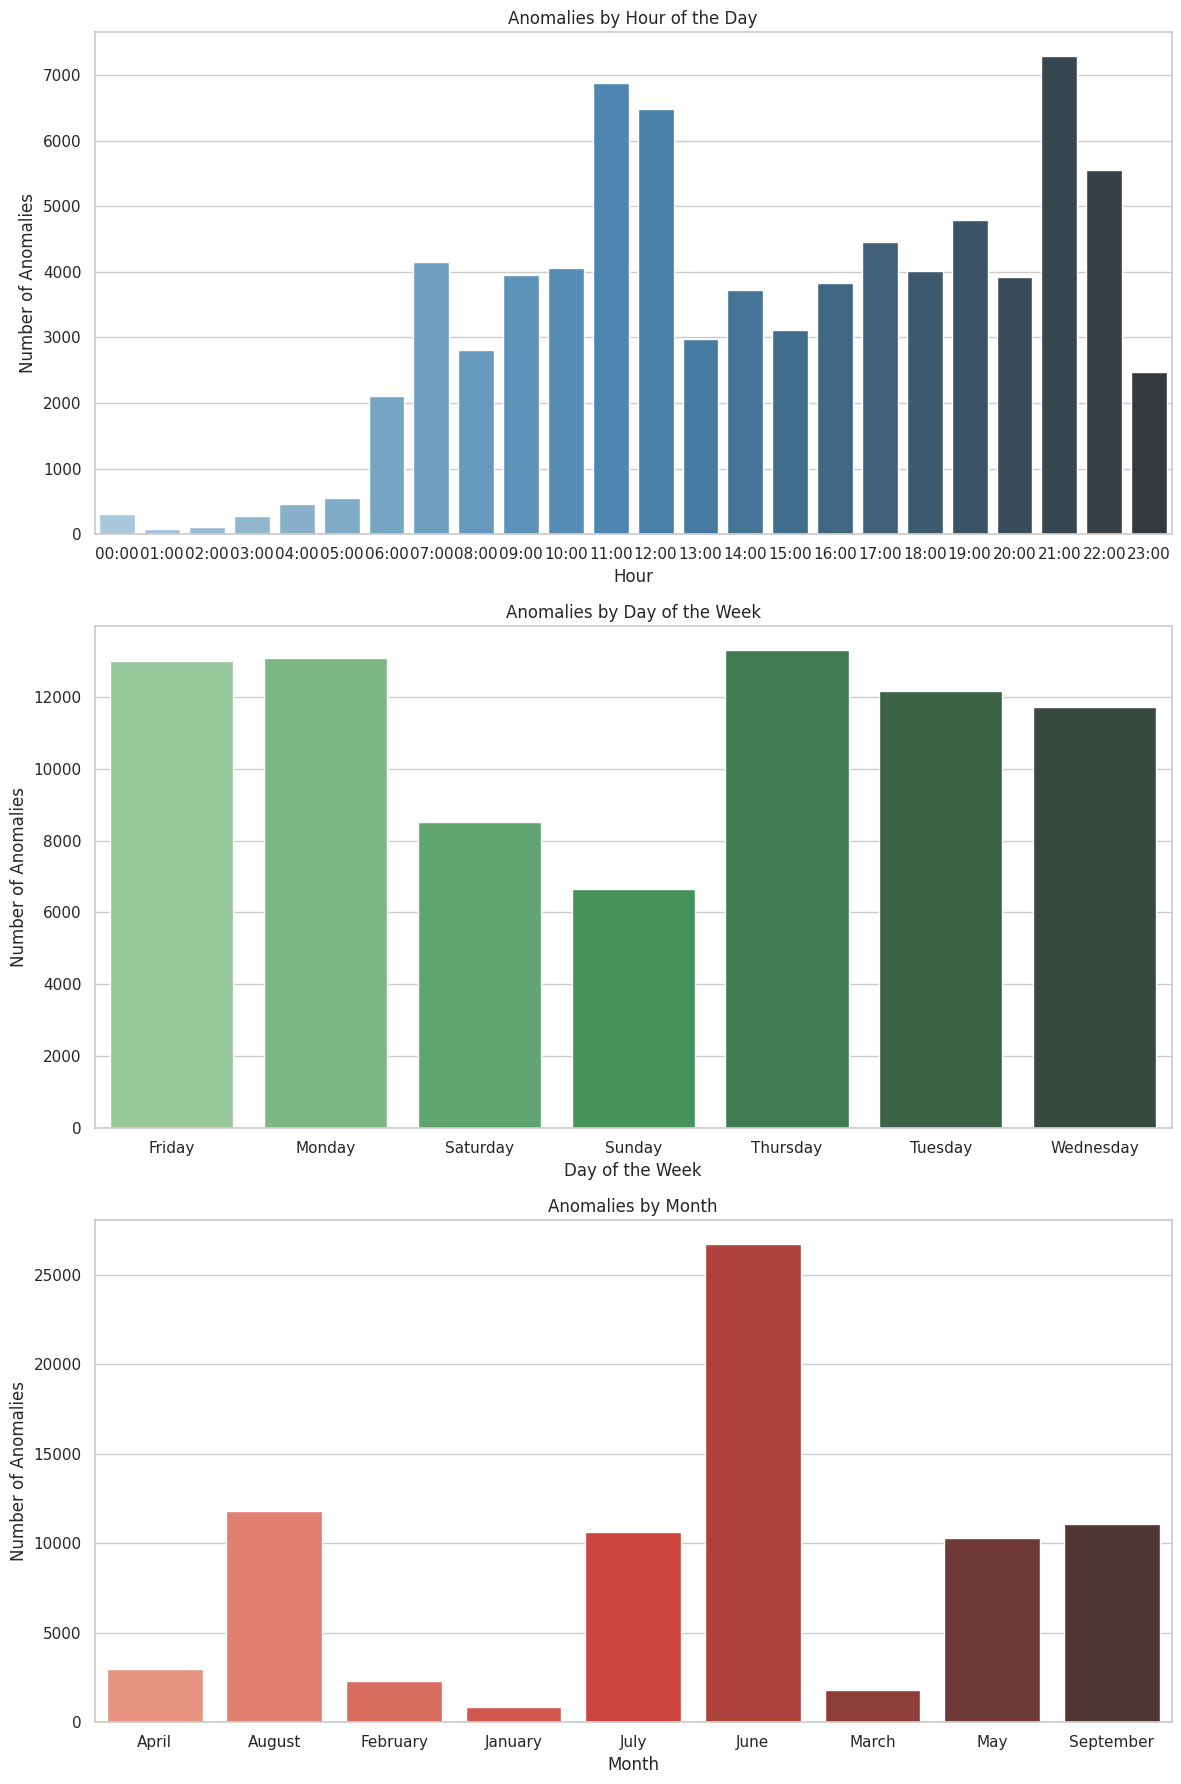

In [32]:
sns.set(style="whitegrid")

hourly_data = anomalies_by_hour.reset_index()
daily_data = anomalies_by_day.reset_index()
monthly_data = anomalies_by_month.reset_index()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

sns.barplot(x='Hour', y='airTempAnomaly', data=hourly_data, ax=axes[0], palette="Blues_d")
axes[0].set_title('Anomalies by Hour of the Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Number of Anomalies')

sns.barplot(x='Day_of_Week', y='airTempAnomaly', data=daily_data, ax=axes[1], palette="Greens_d")
axes[1].set_title('Anomalies by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Anomalies')

sns.barplot(x='Month', y='airTempAnomaly', data=monthly_data, ax=axes[2], palette="Reds_d")
axes[2].set_title('Anomalies by Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Number of Anomalies')

plt.tight_layout()

plt.show()

**Observation Each Day:** Higher frequencies of anomalies are noticeable during late morning and evening hours. Early morning hours generally show fewer anomalies.

**Observation Each Month:** The summer months exhibit a higher frequency of anomalies, particularly on specific days of the week. Winter months show fewer anomalies, suggesting a possible correlation with ambient temperatures.

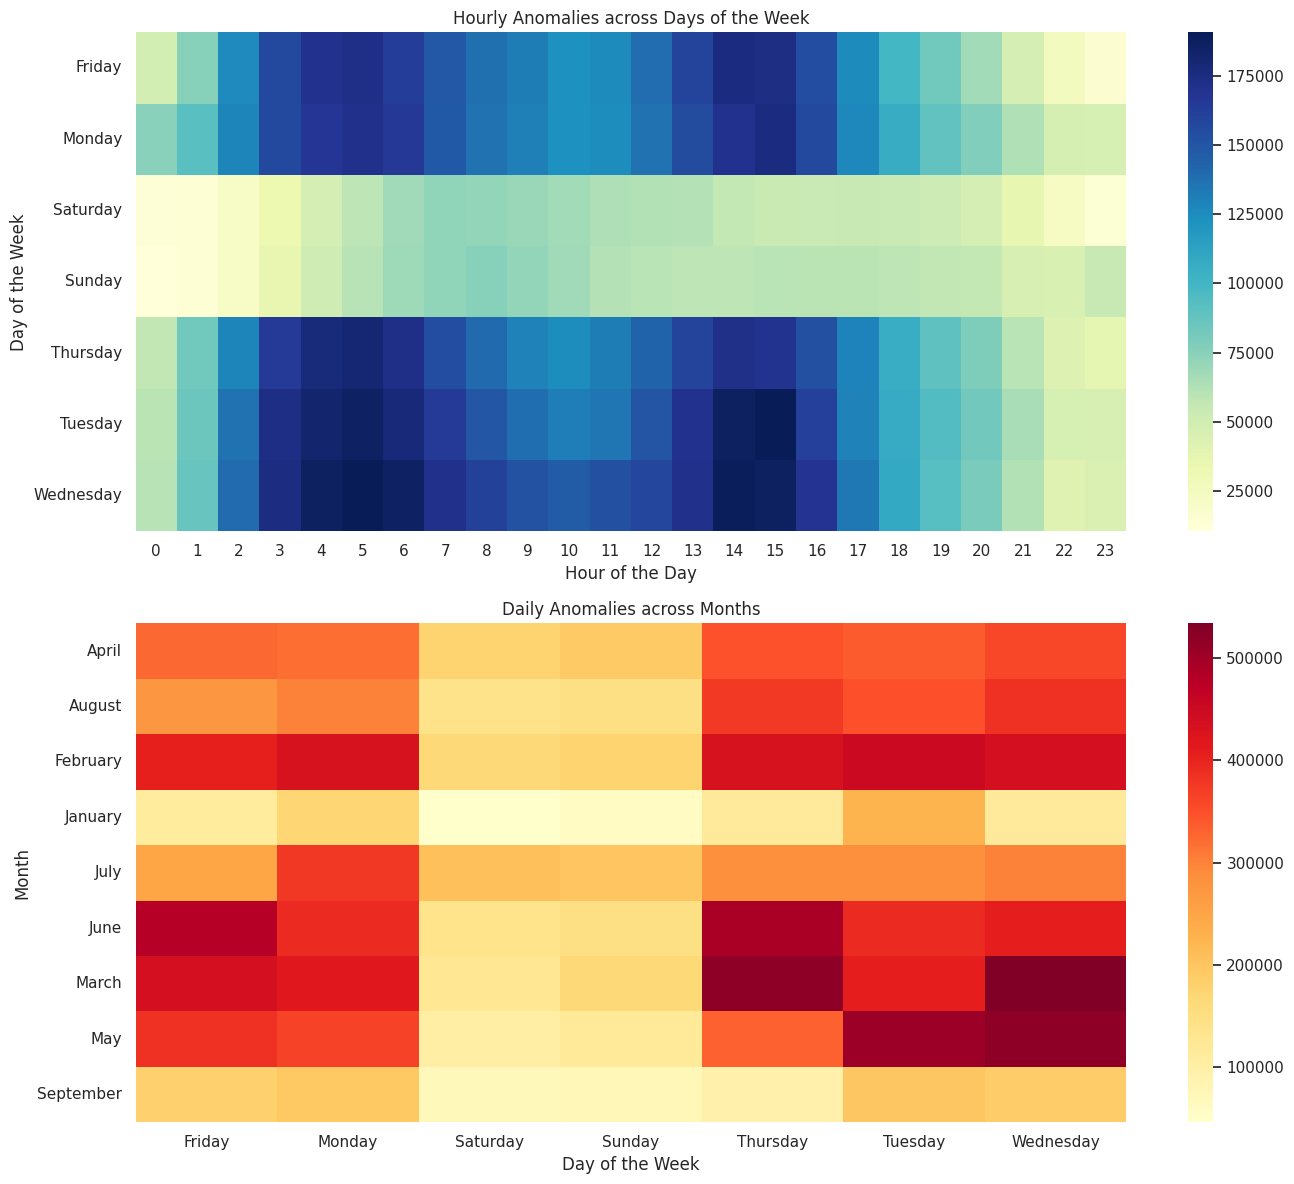

In [15]:
hourly_pivot = data.pivot_table(index='Day_of_Week', columns='Hour', values='Anomaly_Flag', aggfunc='count')
monthly_pivot = data.pivot_table(index='Month', columns='Day_of_Week', values='Anomaly_Flag', aggfunc='count')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

sns.heatmap(hourly_pivot, cmap="YlGnBu", ax=axes[0])
axes[0].set_title('Hourly Anomalies across Days of the Week')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Day of the Week')

sns.heatmap(monthly_pivot, cmap="YlOrRd", ax=axes[1])
axes[1].set_title('Daily Anomalies across Months')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Month')

plt.tight_layout()

plt.show()


# Correlation Between External Weather Conditions and Anomalies in Train Cooling Systems

1. Air Temperature Anomalies:
External Temperature: Shows a weak positive correlation, indicating a slight increase in air temperature anomalies with higher external temperatures.
Humidity and Rain: Both show very weak negative correlations with air temperature anomalies, suggesting that higher humidity or rainfall slightly reduces the likelihood of these anomalies, though the effect is minimal.
2. Water Temperature Anomalies:
Overall: Very weak or negligible correlations with all weather conditions. This suggests that external weather has little to no direct influence on water temperature anomalies in the cooling systems.
3. Oil Temperature Anomalies:
Indicating no variation for a meaningful correlation assessment. This could be due to the rarity of oil temperature anomalies in the dataset.

In [11]:
data['Air_Temp_Anomaly'] = ((data['RS_E_InAirTemp_PC1'] > 65) | (data['RS_E_InAirTemp_PC2'] > 65)).astype(int)
data['Water_Temp_Anomaly'] = ((data['RS_E_WatTemp_PC1'] > 100) | (data['RS_E_WatTemp_PC2'] > 100)).astype(int)
data['Oil_Temp_Anomaly'] = ((data['RS_T_OilTemp_PC1'] > 115) | (data['RS_T_OilTemp_PC2'] > 115)).astype(int)

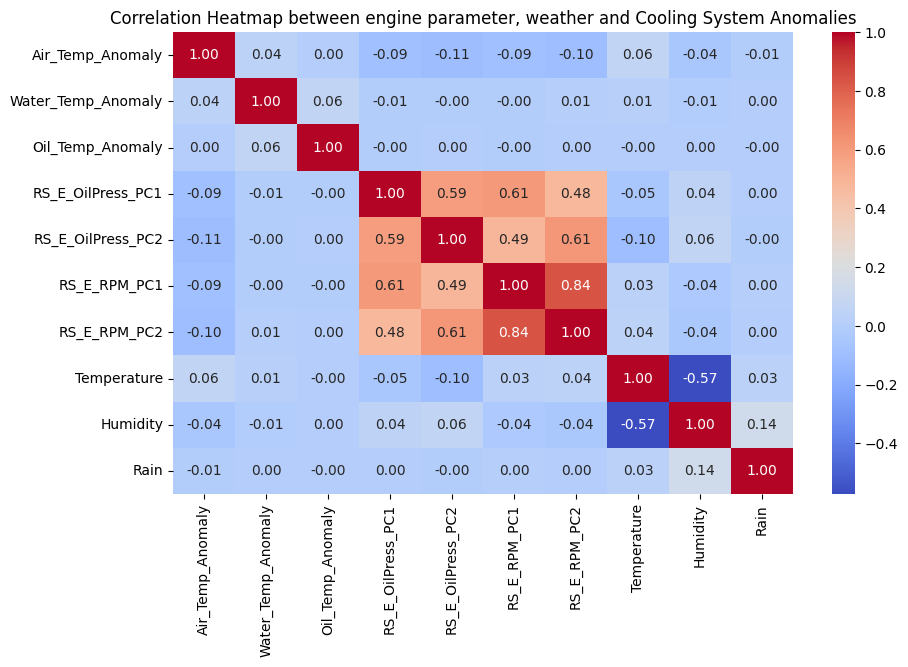

In [14]:
correlation_matrix = data[['Air_Temp_Anomaly', 'Water_Temp_Anomaly', 'Oil_Temp_Anomaly', 
                           'RS_E_OilPress_PC1', 'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2',
                           'Temperature', 'Humidity', 'Rain']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between engine parameter, weather and Cooling System Anomalies')
plt.show()